In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

log_pred = log_model.predict(X_test)

log_accuracy = accuracy_score(y_test, log_pred)

print("Logistic Regression Accuracy:", log_accuracy)

Logistic Regression Accuracy: 1.0


In [42]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

dt_pred = dt_model.predict(X_test)

dt_accuracy = accuracy_score(y_test, dt_pred)

print("Decision Tree Accuracy:", dt_accuracy)

Decision Tree Accuracy: 1.0


In [43]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_pred)

print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 1.0


In [44]:
import pandas as pd

results = {
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest"],
    "Accuracy": [log_accuracy, dt_accuracy, rf_accuracy]
}

results_df = pd.DataFrame(results)

print(results_df)

                 Model  Accuracy
0  Logistic Regression       1.0
1        Decision Tree       1.0
2        Random Forest       1.0


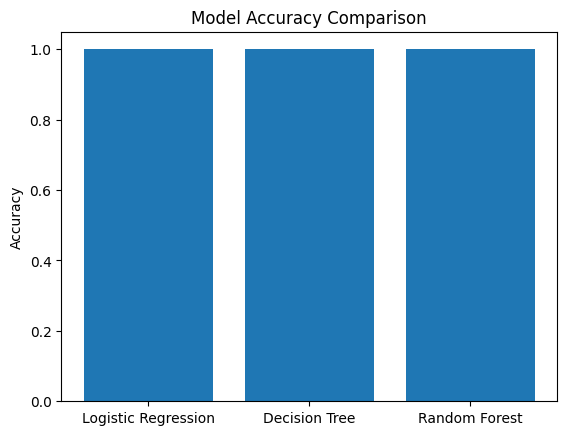

In [45]:
import matplotlib.pyplot as plt

plt.bar(results_df["Model"], results_df["Accuracy"])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()

In [46]:
# STEP 6: Train Test Split
X = df_model.drop("survived", axis=1)
y = df_model["survived"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [47]:
# STEP 7: Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

Logistic Regression Accuracy: 1.0
[[105   0]
 [  0  74]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        74

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



In [48]:
# STEP 8: Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))

Decision Tree Accuracy: 1.0
[[105   0]
 [  0  74]]


In [49]:
# STEP 9: Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Accuracy: 1.0
[[105   0]
 [  0  74]]


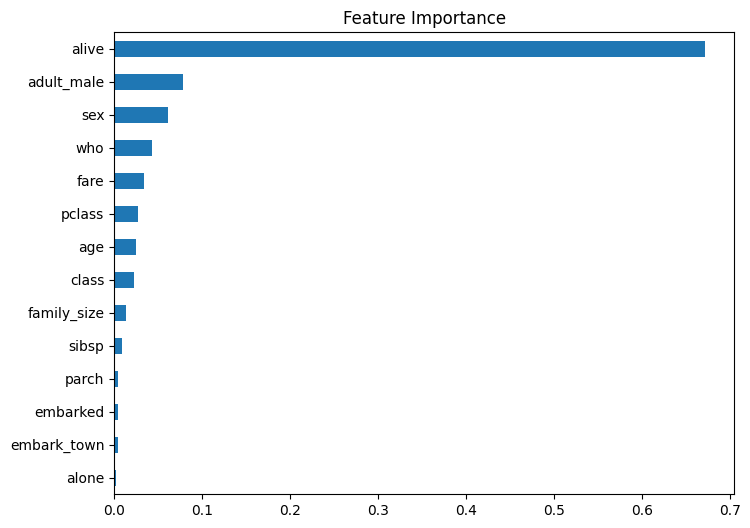

In [50]:
# STEP 10: Feature Importance
importance = pd.Series(
    rf_model.feature_importances_,
    index=X.columns
)

importance.sort_values().plot(kind="barh", figsize=(8,6))
plt.title("Feature Importance")
plt.show()

In [51]:
# STEP 11: GridSearchCV (Bonus)
param_grid = {
    "n_estimators": [50, 100],
    "max_depth": [None, 5, 10]
}

grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5
)

grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)

best_model = grid.best_estimator_

y_pred_best = best_model.predict(X_test)

print("Tuned Random Forest Accuracy:", accuracy_score(y_test, y_pred_best))

Best Parameters: {'max_depth': None, 'n_estimators': 50}
Tuned Random Forest Accuracy: 1.0
